# Método do Gradiente (Básico)

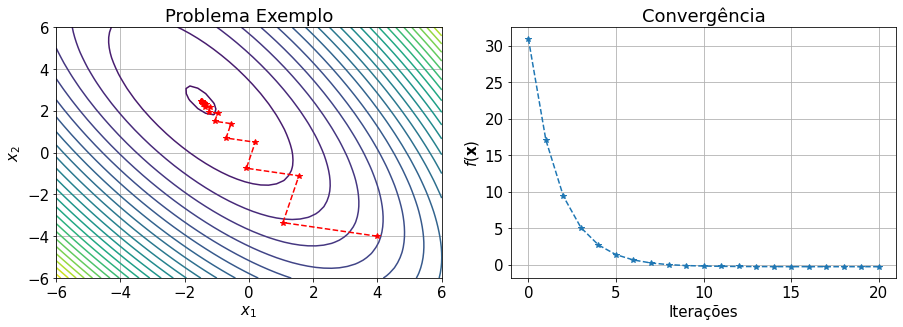

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize as opt
plt.rcParams.update({'font.size': 15})

# Definição da função objetivo
def func(x):
    x1, x2 = x[0], x[1]
    return 2*x1**2 + x2**2 + 2*x1*x2 + x1 - 2*x2 + 3

# Definição do gradiente
def gradiente(x):
    x1, x2 = x[0], x[1]
    grad = np.zeros(2)
    grad[0] = 4*x1 + + 2*x2 + 1 # Derivada em relação a x1
    grad[1] = 2*x2 + 2*x1 - 2 # Derivada em relação a x2
    return grad

# Parametros iniciais
x0 = np.array([4, -4], dtype=float) # Ponto inicial
maxit = 20 # Número de iterações

# Definição inicial das variáveis do processo iterativo
x = x0
fx = func(x0)
xhist = [np.copy(x0)]
fxhist = [fx]
    
# Critério de parada: número de iterações
for k in range(maxit):
        
    # Calcula gradiente de maneira exata
    grad = gradiente(x)

    # Define a direção de busca
    d = -grad
        
    # A função que representará nossa otimização unidimensional
    def theta(alpha, x, d, func):
        fx = func(x + alpha*d)
        return fx

    # Otimização unidimensional para determinar o passo na direção d
    alpha = opt.minimize_scalar(theta, args=(x, d, func), method='golden').x
        
    # Atualiza
    x = x + alpha*d
    fx = func(x)
        
    xhist.append(np.copy(x))
    fxhist.append(fx)

xhist = np.array(xhist)
fxhist = np.array(fxhist)

# Malha para plotar contorno
x1, x2 = np.meshgrid(np.linspace(-6, 6),
                     np.linspace(-6, 6))

# Avalia função para plotar contorno
f = 2*x1**2 + x2**2 + 2*x1*x2 + x1 - 2*x2 + 3

# Plota trajetória
_, axis = plt.subplots(ncols=2, figsize=[2*6.4, 4.8])
axis[0].contour(x1, x2, f, levels=30)
axis[0].plot(xhist[:, 0], xhist[:, 1], '--*r')
axis[0].set_xlabel(r'$x_1$')
axis[0].set_ylabel(r'$x_2$')
axis[0].set_title('Problema Exemplo')
axis[0].grid()

# Plota convergencia
axis[1].plot(fxhist, '--*')
axis[1].set_xlabel('Iterações')
axis[1].set_ylabel(r'$f(\mathbf{x})$')
axis[1].set_title('Convergência')
axis[1].grid()

plt.tight_layout()
plt.show()